In [36]:
import json
import os
from scipy import stats
from scipy.stats import normaltest, mannwhitneyu, ttest_ind, shapiro
import scipy



In [37]:
f = open('../report_generators/processed_data/react/TEST/test.json')
dataset_1 = json.loads(f.read())
f.close()
# print(dataset_1)

f = open('../report_generators/processed_data/react/TEST/non_test.json')
dataset_2 = json.loads(f.read())
f.close()
# print(angular_dataset)

In [38]:
def t_test():
    stat, p_val = ttest_ind(dataset_1, dataset_2,alternative='two-sided', trim=0)
    print("P-Value: " , p_val)
    print("stat = ", stat)

# t_test()

In [39]:
def mann_whitney():
    stat, p_val = mannwhitneyu(dataset_1, dataset_2, method="auto")
    # print(U1)
    print("P-Value: ", p_val)
    print("stat = ", stat)
# mann_whitney()

In [40]:

if normaltest(dataset_1).pvalue >= 0.005 and normaltest(dataset_2).pvalue >= 0.005:
     print ('normal distribution')
     t_test()
     
else:
     print('not normal distribution')
     mann_whitney()


not normal distribution
P-Value:  0.006676383765172443
stat =  3488235.0


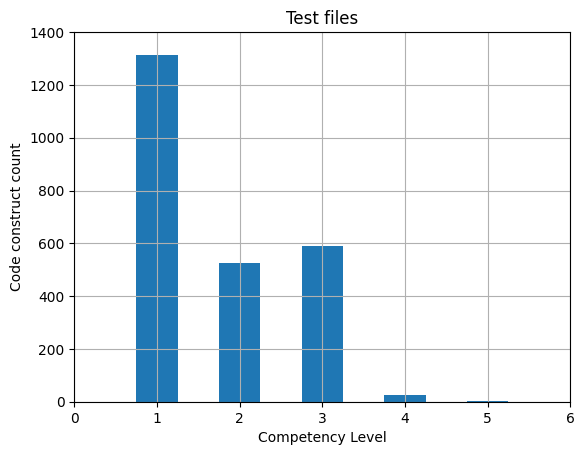

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
# np.random.seed(19680801)

# mu, sigma = 100, 15
# x = mu + sigma * np.random.randn(10000)

# the histogram of the data
# print(react_dataset)
# narray = np.array(dataset_1)
# n, bins, patches = plt.hist(narray)

plt.axis([0, 6, 0, 1400])
plt.xlabel('Competency Level')
plt.ylabel('Code construct count')
plt.title('Test files')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)

plt.hist(np.array(dataset_1), bins=range(1,7), align='left', rwidth=0.5)
plt.show()

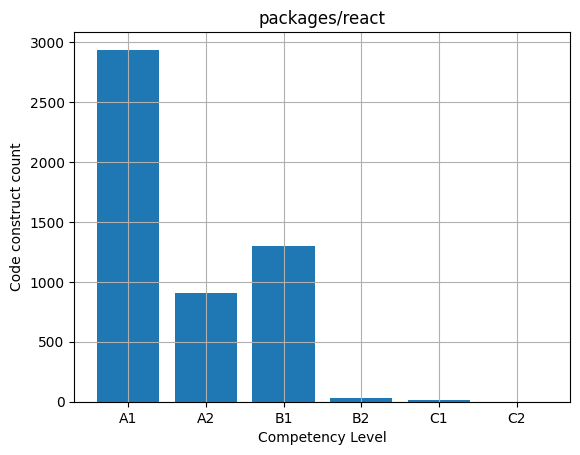

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
# np.random.seed(19680801)

# mu, sigma = 100, 15
# x = mu + sigma * np.random.randn(10000)

# the histogram of the data
# print(react_dataset)
# narray = np.array(dataset_1)
# n, bins, patches = plt.hist(narray)

# plt.axis([0, 6, 0, 1800])
plt.xlabel('Competency Level')
plt.ylabel('Code construct count')
plt.title('packages/react')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)

data = [2935,
        909,
        1300,
        33,
        13,
        0]

header = [
        "A1",
        "A2",
        "B1",
        "B2",
        "C1",
        "C2",
]

plt.bar(header, data, align='center')
plt.show()